In [3]:
import numpy as np

### Import Signal 和 Array

`signal.py`定义了一些常用的信号类型，信号对应的 Class 都继承自`Signal`基类, 用于产生多个入射信号  
`array.py`定义了一些常用的阵列结构，所有的阵列对应的 Class 都继承自`Array`基类，`Array`会使用`Signal`产生的信号以及入射角度，根据阵列接受信号的数学模型生成阵列接受信号的仿真数据

阵列接收信号的数学模型（窄带信号）:
$\bf{X} = \bf{A} \bf{S}$

其中：
$\bf{X} = \begin{bmatrix}
x_1(t) & x_2(t) & \dots & x_M(t)
\end{bmatrix}^T$ 是一个$M\times 1$维的向量，表示阵列接收到的信号

$\bf{A} = \begin{bmatrix}
\bf{a}(\theta_1) & \bf{a}(\theta_2) & \dots & \bf{a}(\theta_N)
\end{bmatrix}$ 是一个$M \times N$维的矩阵，表示阵列的流型矩阵  
$\bf{a}(\theta_n) =\begin{bmatrix}
e^{-j \omega_0 \tau_{1n}} & e^{-j \omega_0 \tau_{2n}} \dots & e^{-j \omega_0 \tau_{Mn}}
\end{bmatrix}^T$是与入射角度对应的导向矢量

$\bf{X} = \begin{bmatrix}
s_1(t) & s_2(t) & \dots & s_N(t)
\end{bmatrix}^T$ 是一个$N\times 1$维的向量，表示入射的信号


In [4]:
from classical_doa.arrays import UniformLinearArray
from classical_doa.signals import ComplexStochasticSignal

### 设定仿真参数

设定与阵列结构以及信号参数、入射方向有关的仿真参数，产生采样后的阵列接受信号


In [5]:
# 信号参数
num_snapshots = 300
signal_fre = 2e7
fs = 5e7
snr = 0

# 阵列参数
num_antennas = 8
antenna_spacing = 0.5 * (3e8 / signal_fre)  # 阵元间距半波长

# 入射角度
angle_incidence = np.array([0, 30, -60])
num_signal = len(angle_incidence)

### 生成仿真信号

创建`Array`和`Signal`的实例，并生成阵列接受信号的仿真数据


In [6]:
# 创建信号实例
signal = ComplexStochasticSignal(nsamples=num_snapshots, fre=signal_fre, fs=fs)

# 创建阵列实例
array = UniformLinearArray(m=num_antennas, dd=antenna_spacing)

# 使用信号和阵列生成仿真数据
received_data = array.received_signal(
    signal=signal, snr=snr, angle_incidence=angle_incidence, unit="deg"
)

### 估计入射角

`algorithm`中定义了几种经典的 DOA 估计算法，有些算法会输出空间谱，有些算法会直接输出估计的入射角的值  
首先 import 两个和绘图函数，分别用于展示这两种算法的估计结果


In [7]:
from classical_doa.plot import plot_estimated_value, plot_spatial_spectrum

#### MUSIC 算法


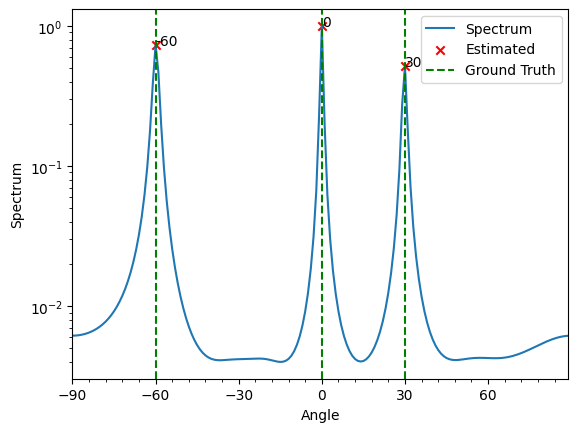

In [8]:
search_grids = np.arange(-90, 90, 1)

from classical_doa.algorithm import music

music_spectrum = music(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    angle_grids=search_grids,
    unit="deg",
)

# 绘制空间谱
plot_spatial_spectrum(
    spectrum=music_spectrum,
    angle_grids=search_grids,
    ground_truth=angle_incidence,
    num_signal=num_signal,
)

#### Root-MUSIC 算法


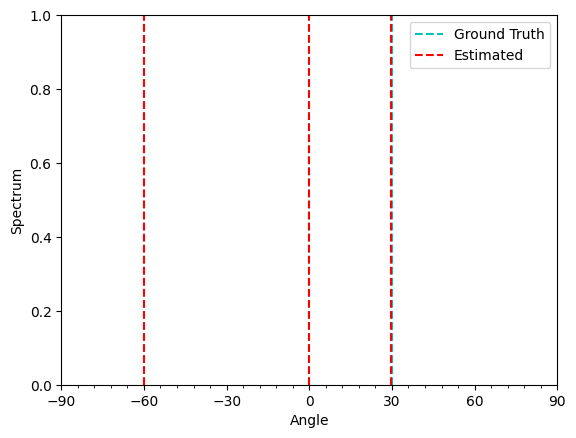

In [9]:
from classical_doa.algorithm import root_music

rmusic_estimates = root_music(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    unit="deg",
)
plot_estimated_value(estimates=rmusic_estimates, ground_truth=angle_incidence)

#### ESPRIT 算法


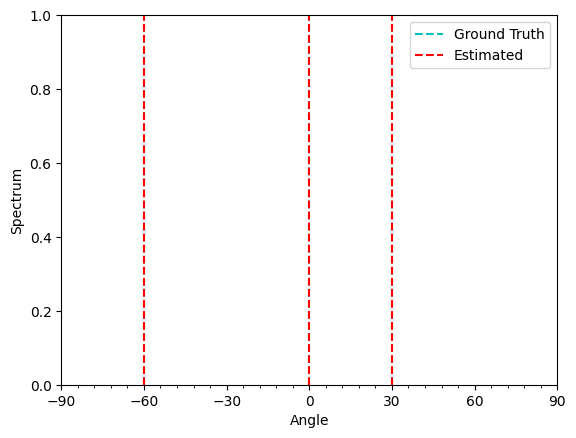

In [10]:
from classical_doa.algorithm import esprit

esprit_estimates = esprit(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
)

plot_estimated_value(estimates=esprit_estimates, ground_truth=angle_incidence)

#### OMP 算法


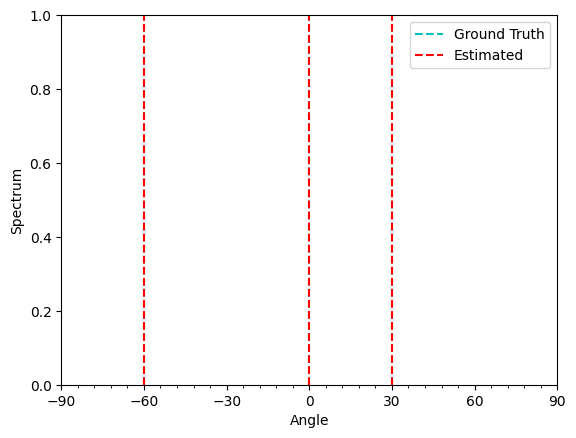

In [11]:
from classical_doa.algorithm import omp

omp_estimates = omp(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    angle_grids=search_grids,
    unit="deg",
)

plot_estimated_value(estimates=omp_estimates, ground_truth=angle_incidence)